In [1]:
import json
import seaborn
import pylab as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.sans-serif'] = ['DengXian']  
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
with open('./results/ec_rnn_desc.json', 'r', encoding='utf8')as fp:
    ec_rnn = json.load(fp)
with open('./results/ec_lstm_desc.json', 'r', encoding='utf8')as fp:
    ec_lstm = json.load(fp)
with open('./results/ec_att_desc.json', 'r', encoding='utf8')as fp:
    ec_att = json.load(fp)
with open('./results/ec_geo_desc.json', 'r', encoding='utf8')as fp:
    ec_geo = json.load(fp)
with open('./results/ec_pre_desc.json', 'r', encoding='utf8')as fp:
    ec_pre = json.load(fp)
with open('./results/ec+kt+mtl_desc.json', 'r', encoding='utf8')as fp:
    ec_mtl = json.load(fp)

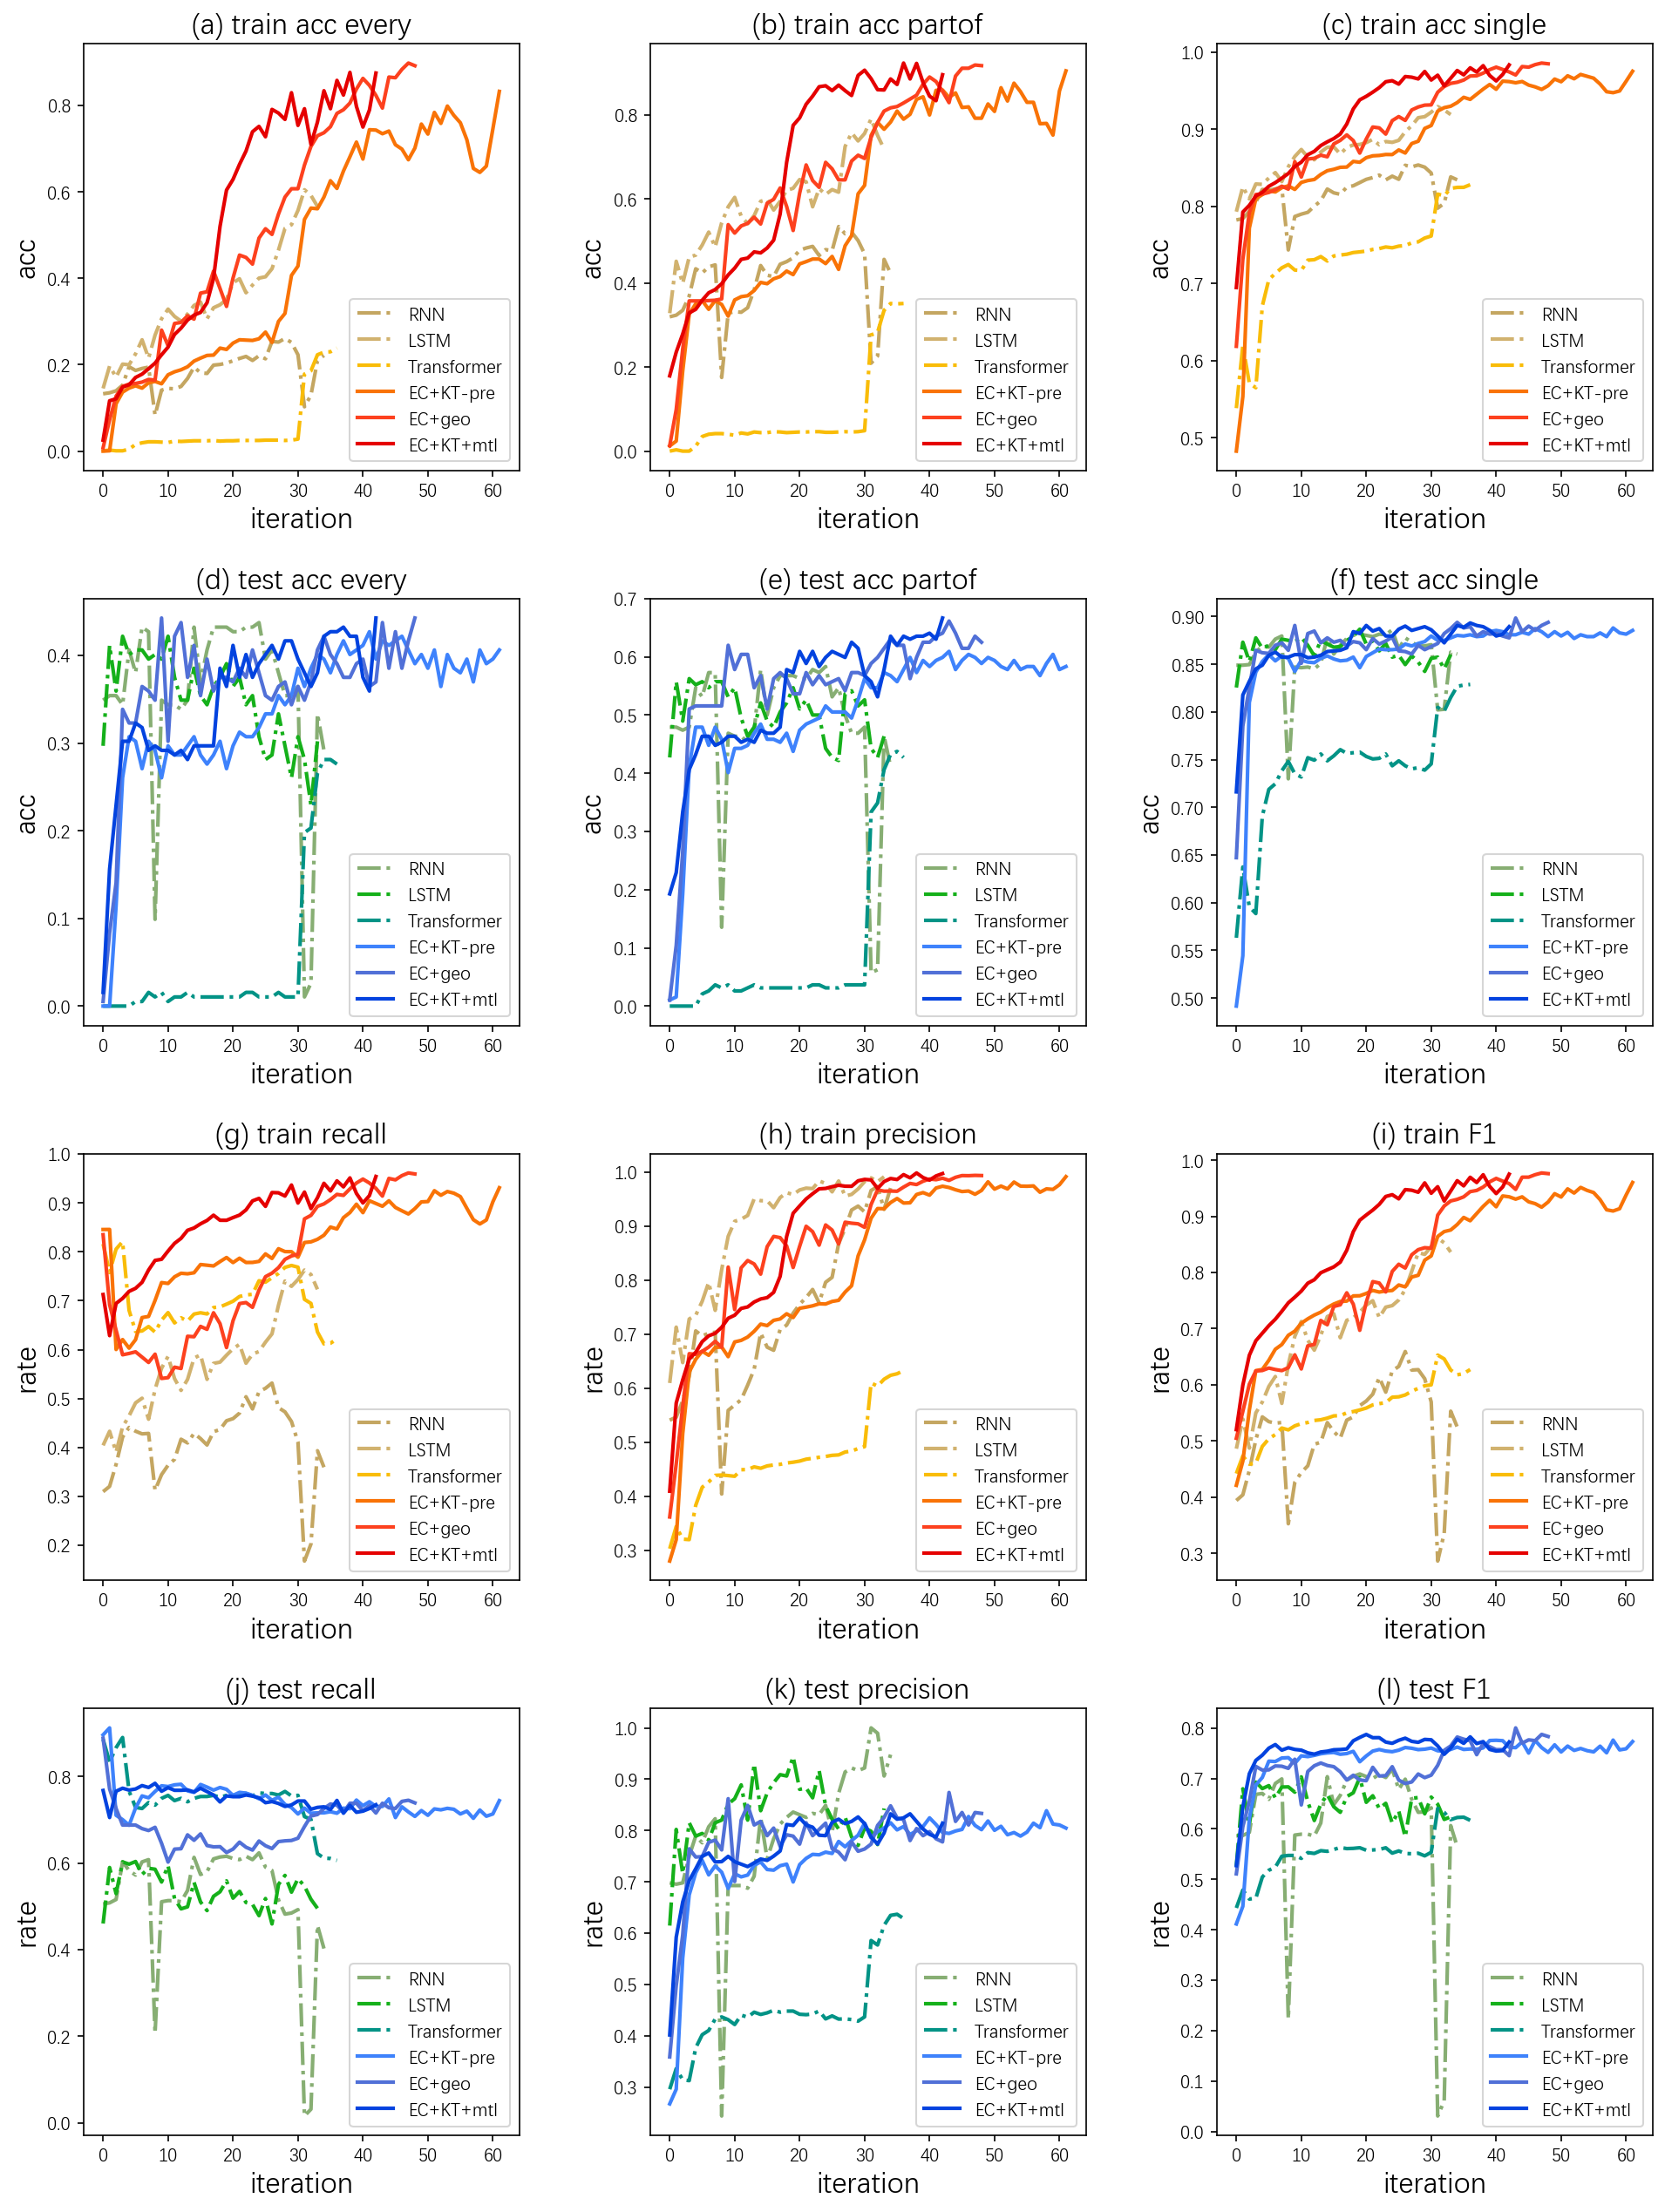

In [3]:
fig = plt.figure(num=1, figsize=(15, 20), dpi=150, clear=True)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, hspace=0.3, wspace=0.3)
ax1 = fig.add_subplot(4, 3, 1)
ax2 = fig.add_subplot(4, 3, 2)
ax3 = fig.add_subplot(4, 3, 3)
ax4 = fig.add_subplot(4, 3, 4)
ax5 = fig.add_subplot(4, 3, 5)
ax6 = fig.add_subplot(4, 3, 6)
ax7 = fig.add_subplot(4, 3, 7)
ax8 = fig.add_subplot(4, 3, 8)
ax9 = fig.add_subplot(4, 3, 9)
axa = fig.add_subplot(4, 3, 10)
axb = fig.add_subplot(4, 3, 11)
axc = fig.add_subplot(4, 3, 12)

ax_list = [ax1, ax2, ax3 , ax4, ax5, ax6, ax7, ax8, ax9, axa, axb, axc, ]
key_list = ["train_ec_acc_every", "train_ec_acc_partof", "train_ec_acc_single", "test_ec_acc_every", "test_ec_acc_partof", "test_ec_acc_single", 
           "train_ec_recall", "train_ec_precision", "train_ec_F1", "test_ec_recall", "test_ec_precision", "test_ec_F1", ]
title_list = ["(a) train acc every", "(b) train acc partof", "(c) train acc single", "(d) test acc every", "(e) test acc partof", "(f) test acc single", 
           "(g) train recall", "(h) train precision", "(i) train F1", "(j) test recall", "(k) test precision", "(l) test F1", ]
lable_list = ['acc', 'acc', 'acc', 'acc', 'acc', 'acc', 'rate', 'rate', 'rate', 'rate', 'rate', 'rate', ]
loc_list = ['upper right', 'upper right', 'upper right', 'upper right', 'upper right', 'upper right', 
            'lower right', 'upper right', 'upper right', 'lower right', 'upper right', 'upper right', ]
color_list = [['sandy brown', 'tan', 'golden rod', 'orange', 'orange red', 'red'], ['sage', 'green', 'teal', 'dodger blue', 'cornflower blue', 'blue']]
limit_list = [(0, 1), (0, 1), (0.5, 1), (0, 0.5), (0, 0.7), (0.5, 1), (0.4, 1), (0.3, 1), (0.4, 1), (0.5, 1), (0.3, 0.9), (0.4, 0.9)]

for i in range(12):
    l1, = ax_list[i].plot(ec_rnn[key_list[i]], c=seaborn.xkcd_rgb[color_list[(i // 3) % 2][0]], ls='-.', lw='2')
    l2, = ax_list[i].plot(ec_lstm[key_list[i]], c=seaborn.xkcd_rgb[color_list[(i // 3) % 2][1]], ls='-.', lw='2')
    l3, = ax_list[i].plot(ec_att[key_list[i]], c=seaborn.xkcd_rgb[color_list[(i // 3) % 2][2]], ls='-.', lw='2')
    tmp = ec_pre[key_list[i]]
    l4, = ax_list[i].plot([tmp[2*k] for k in range(len(tmp) // 2)], c=seaborn.xkcd_rgb[color_list[(i // 3) % 2][3]], lw='2')
    l5, = ax_list[i].plot(ec_geo[key_list[i]], c=seaborn.xkcd_rgb[color_list[(i // 3) % 2][4]], lw='2')
    l6, = ax_list[i].plot(ec_mtl[key_list[i]], c=seaborn.xkcd_rgb[color_list[(i // 3) % 2][5]], lw='2')
    ax_list[i].set_title(title_list[i], fontsize=16)
    ax_list[i].set_xlabel('iteration', fontsize=16)
    ax_list[i].set_ylabel(lable_list[i], fontsize=16)
#     ax_list[i].set_ylim(limit_list[i])
    ax_list[i].legend([l1, l2, l3, l4, l5, l6], ['RNN', 'LSTM', 'Transformer', 'EC+KT-pre', 'EC+geo', 'EC+KT+mtl'], loc='lower right', fontsize=10)  

plt.savefig('./results/cmp_ec/cmp_ec_plt.jpg')